# Model Selection using RFE (Mixed Approach)

### Importing and Understanding Data

In [78]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
import os 
os.chdir("F:/IIITB_DS/ML/Assignment")

In [81]:
#Read Bike count Data and converting 'dteday' in date format
df_bike=pd.read_csv("day.csv",parse_dates=[1])
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Basic EDA Analysis of data

In [82]:
#shape of the dataset
df_bike.shape

(730, 16)

In [83]:
#checking the columns
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [84]:
#columns info
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

- There is no missing value present in the datasets

In [85]:
# Check for categorical and coninuous variables
df_bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

- Season, yr, month, weekdays, working day, weathersit- are categorical variables 

In [86]:
#Statstical info of columns
df_bike.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


# Visualisation of data

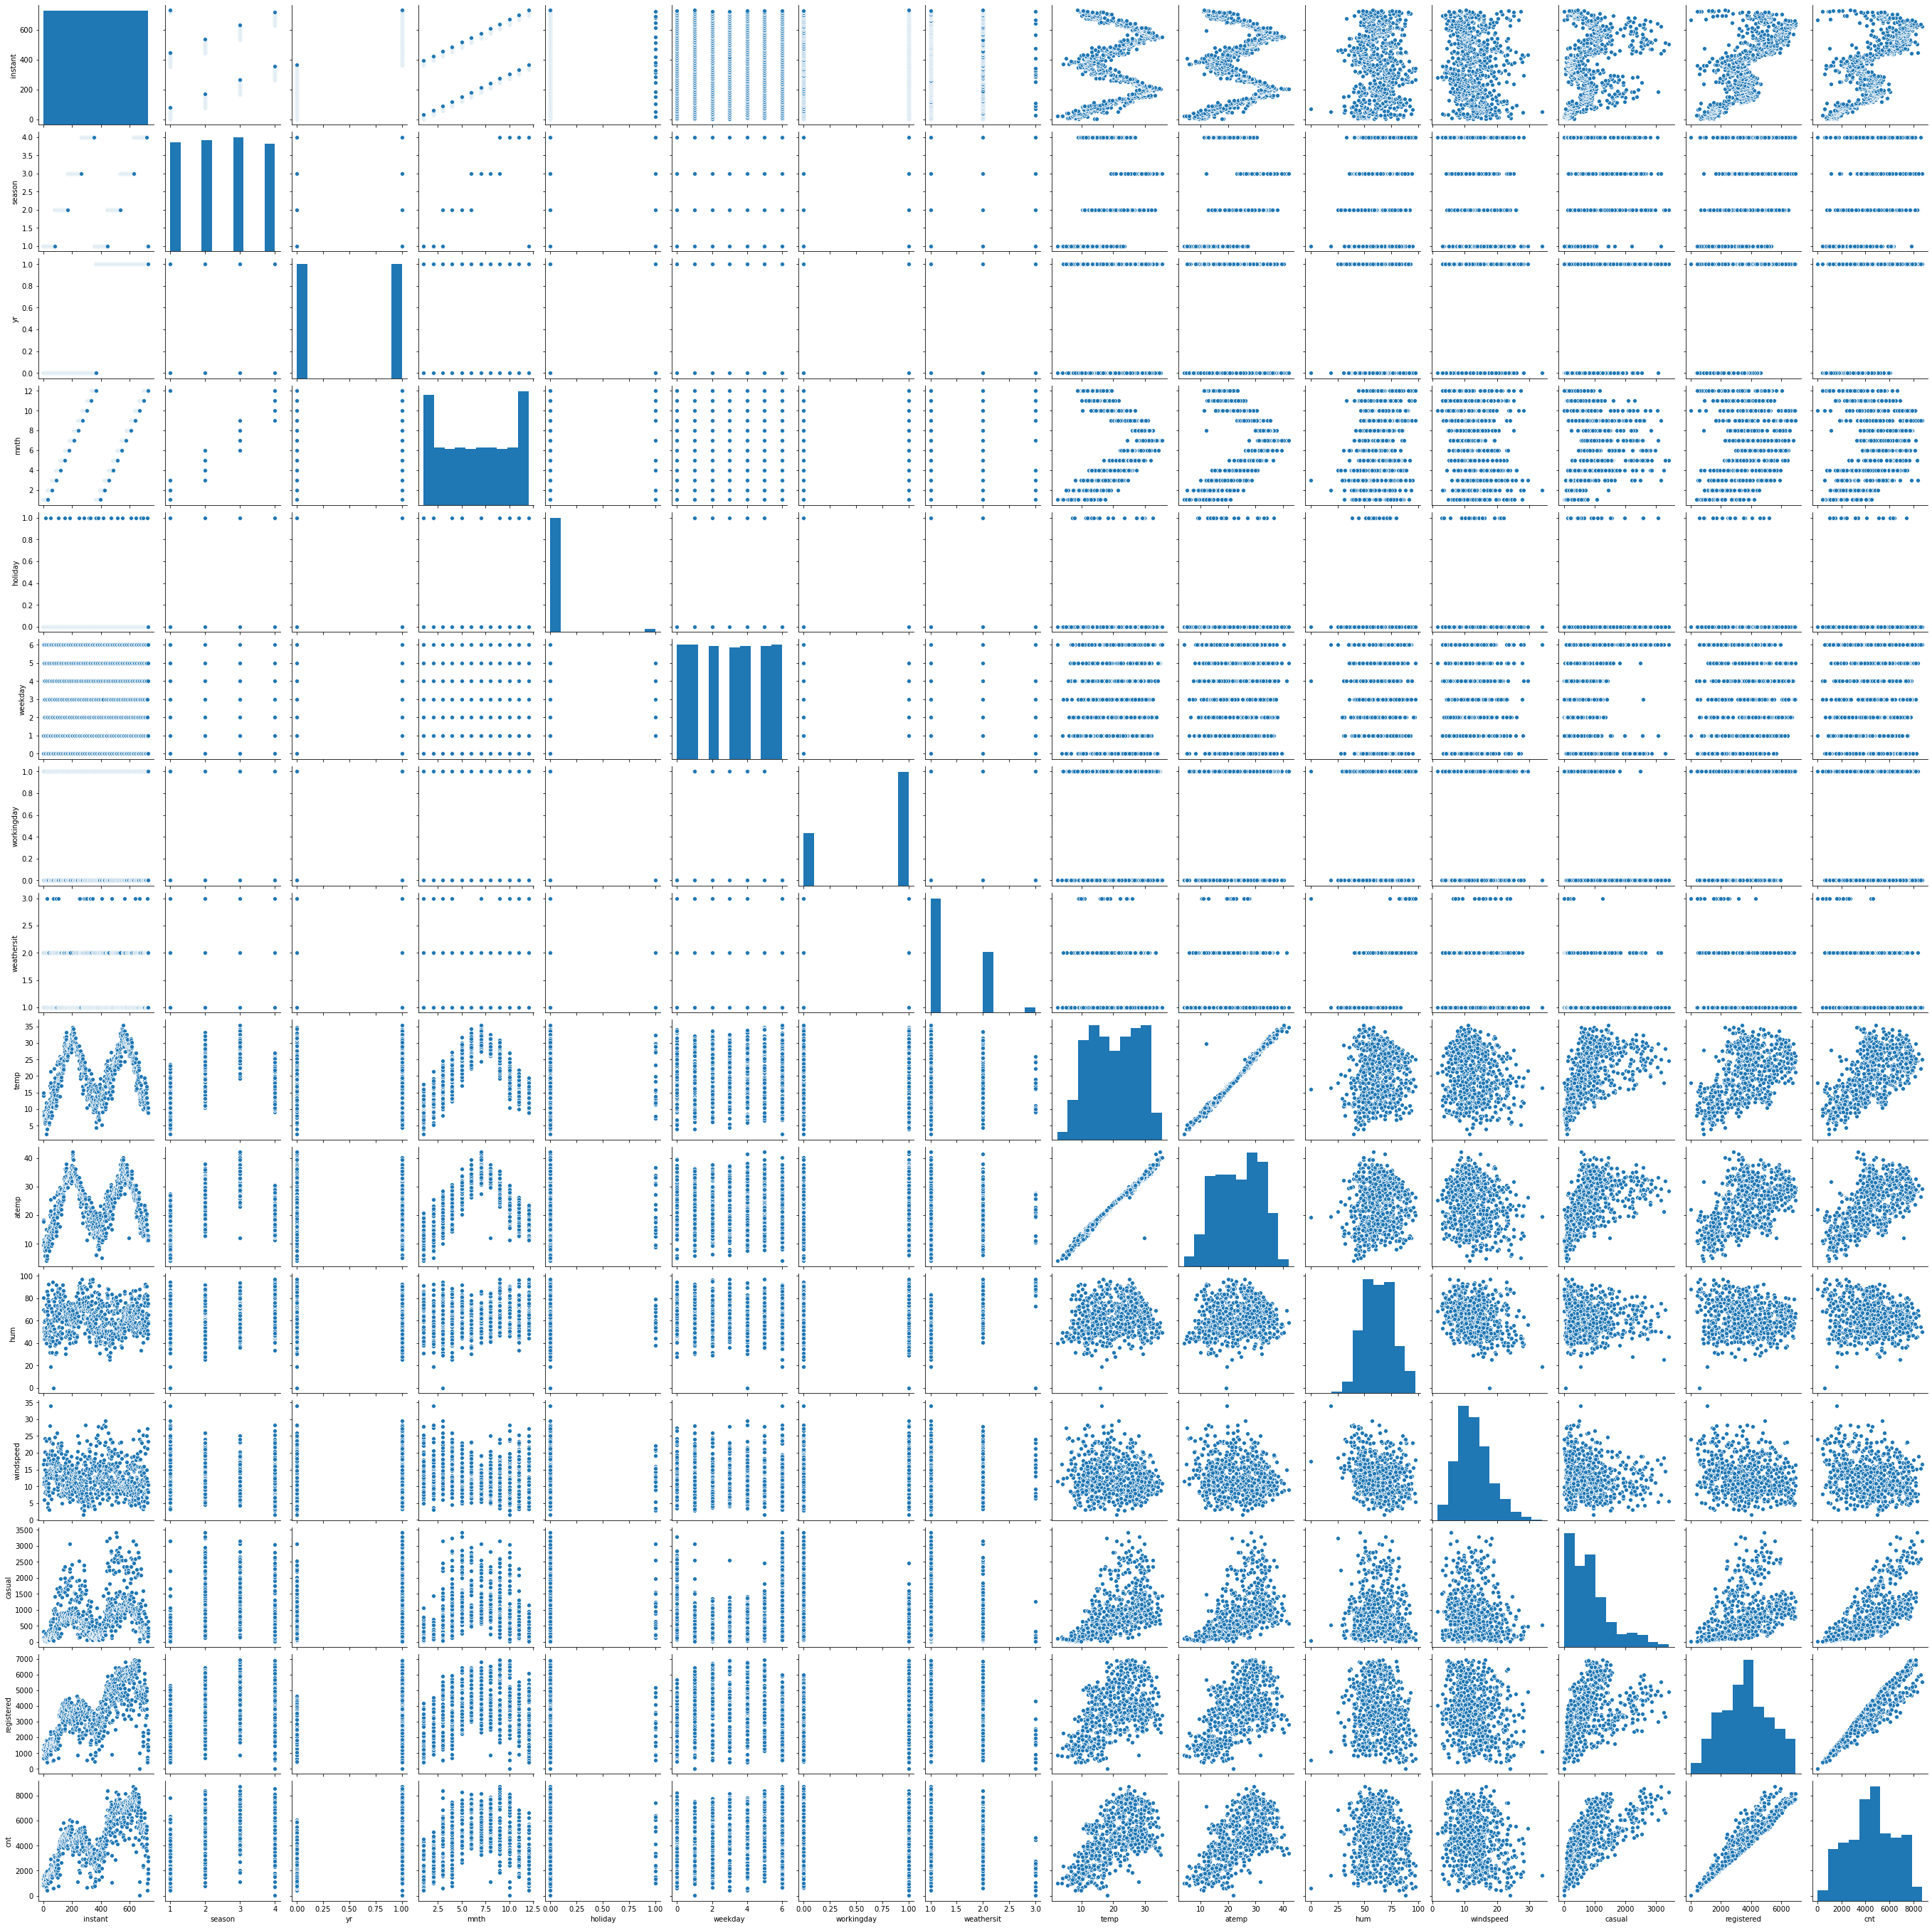

In [139]:
#Pairplot to show the coorelation between variables
sns.pairplot(df_bike);

- Registered and casual variables are highly correlated with cnt and its because sum of casual and registered equals count of bike sales 


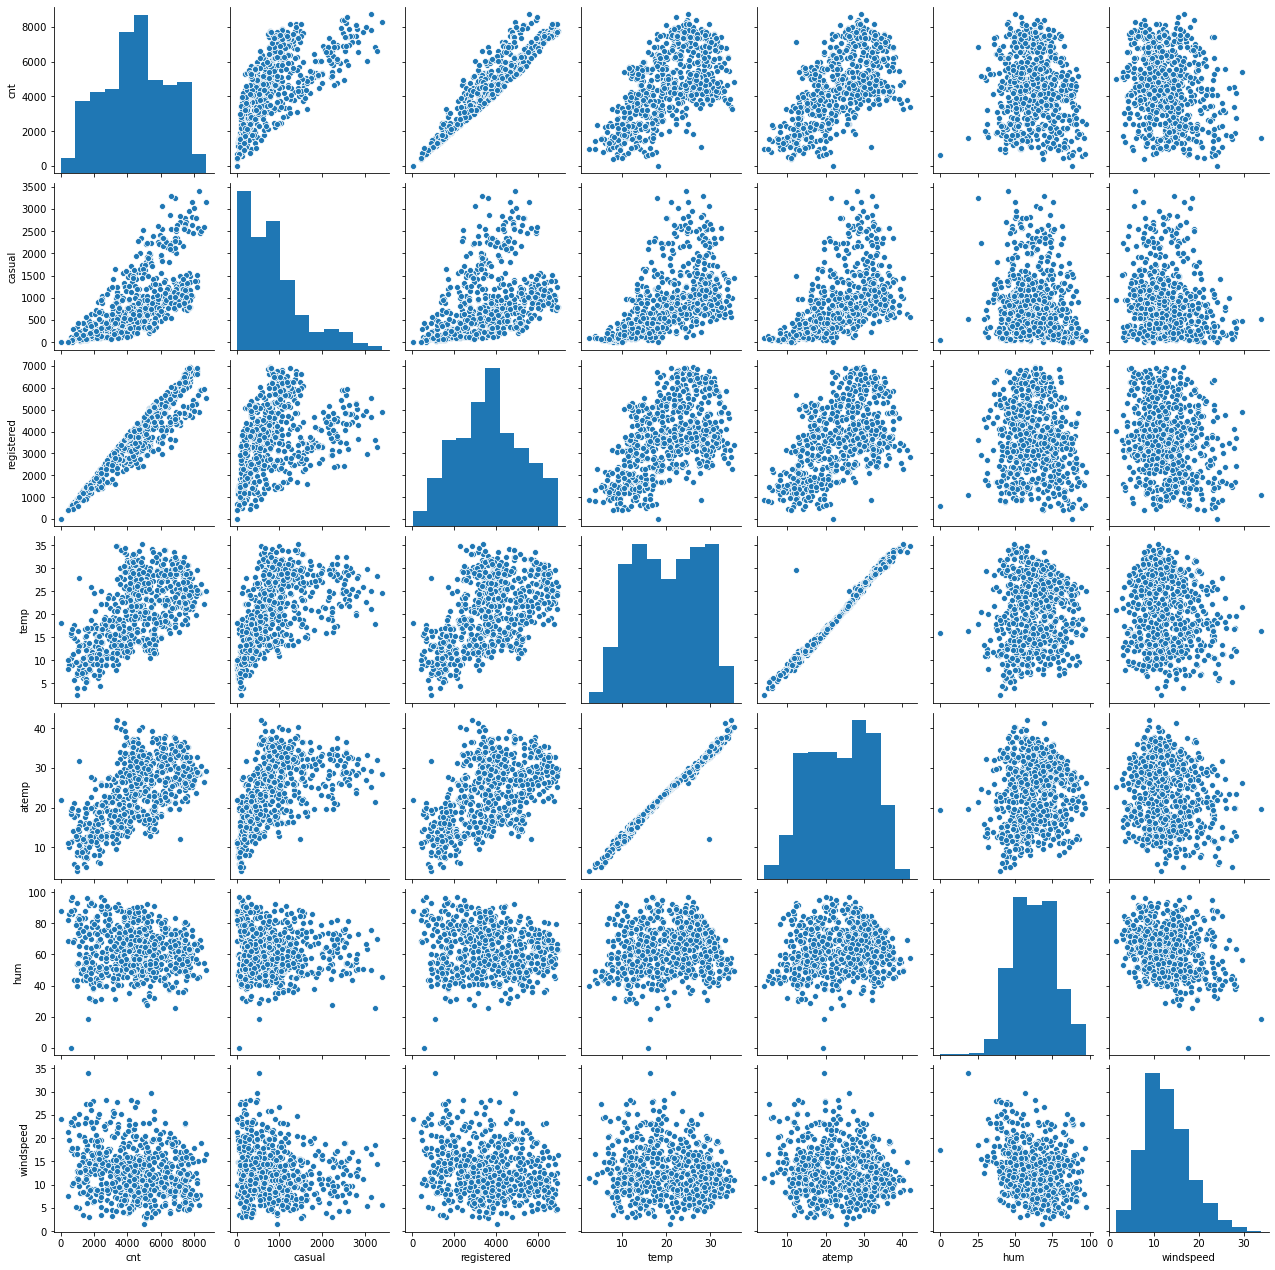

In [140]:
# correlation between continuous variables
sns.pairplot(df_bike,vars=['cnt','casual','registered','temp', 'atemp', 'hum', 'windspeed'])

In [87]:
# correlation between continuous variables
df_bike[['cnt','casual','registered','temp', 'atemp', 'hum', 'windspeed']].corr()

,cnt,casual,registered,temp,atemp,hum,windspeed
cnt,1.000000,0.672123,0.945411,0.627044,0.630685,-0.098543,-0.235132
casual,0.672123,1.000000,0.394137,0.542731,0.543362,-0.075211,-0.167995
registered,0.945411,0.394137,1.000000,0.539436,0.543678,-0.089212,-0.217914
temp,0.627044,0.542731,0.539436,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.543362,0.543678,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,-0.075211,-0.089212,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.167995,-0.217914,-0.158186,-0.183876,-0.248506,1.000000


<AxesSubplot:>

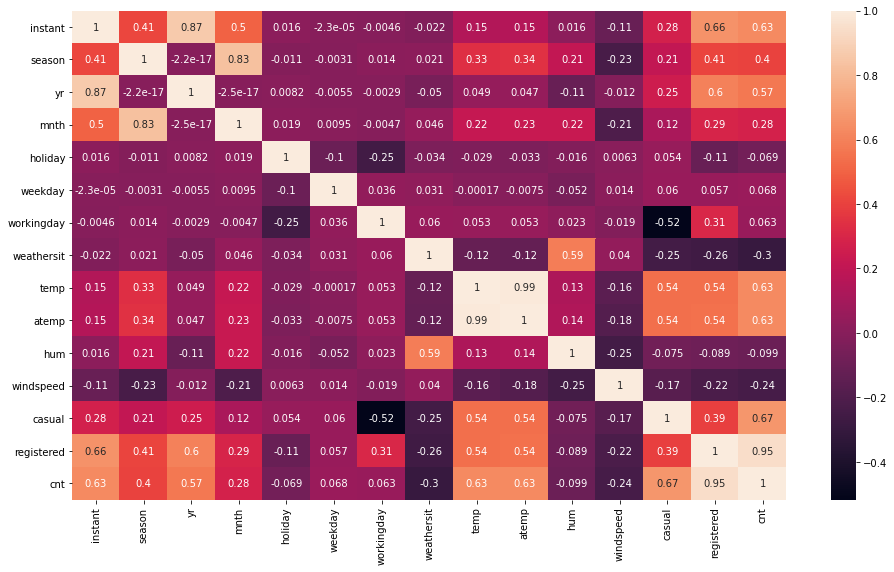

In [88]:
# Heatmap correlation between variables
plt.figure(figsize=(16,9))
sns.heatmap(df_bike.corr(),annot=True)

<AxesSubplot:>

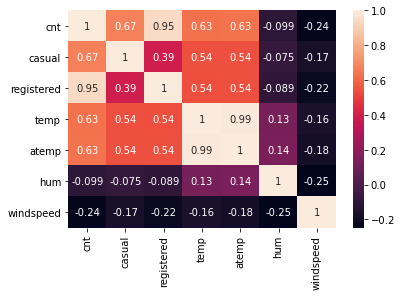

In [89]:
# Heatmap correlation between numerical variables
sns.heatmap(df_bike[['cnt','casual','registered','temp', 'atemp', 'hum', 'windspeed']].corr(),annot=True)

# Dropping the variable

In [90]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [91]:
#Dropping the variable
df_bike=df_bike[[ 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit','temp', 'hum', 'windspeed', 'cnt']]

- Instant, dteday are not necessary for our analysis
- atemp and temp both are somehow similiar variables
- casual and registered and cnt are taken as target variable so taking one of them are enough for our analysis 

## Impute categorical variable in their respective name

In [92]:
df_bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [93]:
def season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

In [94]:
df_bike['season']=df_bike['season'].apply(lambda x: season(x))

In [95]:
df_bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [96]:
def weekdays(x):
    if x==1:
        return 'Monday'
    elif x==2:
        return 'Tuesday'
    elif x==3:
        return 'Wednesday'
    elif x==4:
        return 'Thrusday'
    elif x==5:
        return 'Friday'
    elif x==6:
        return 'Saturday'
    else:
        return 'Sunday'

In [97]:
df_bike['weekday']=df_bike['weekday'].apply(lambda x: weekdays(x))

In [98]:
df_bike.weekday.value_counts()

Monday       105
Saturday     105
Sunday       105
Tuesday      104
Thrusday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [99]:
def weathersit(x):
    if x==1:
        return 'clear'
    elif x==2:
        return 'mist_cloudy'
    elif x==3:
        return 'light_snow_rain'
    else:
        return 'heavy_snow_rain'

In [100]:
df_bike['weathersit']=df_bike['weathersit'].apply(lambda x: weathersit(x))
df_bike.weathersit.value_counts()

clear              463
mist_cloudy        246
light_snow_rain     21
Name: weathersit, dtype: int64

In [101]:
def month(x):
    if x==1:
        return 'Jan'
    elif x==2:
        return 'Feb'
    elif x==3:
        return 'Mar'
    elif x==4:
        return 'April'
    elif x==5:
        return 'May'
    elif x==6:
        return 'June'
    elif x==7:
        return 'July'
    elif x==8:
        return 'Aug'
    elif x==9:
        return 'Sep'
    elif x==10:
        return 'Oct'
    elif x==11:
        return 'Nov'
    else:
        return 'Dec'

In [102]:
df_bike['mnth']=df_bike['mnth'].apply(lambda x: month(x))

In [103]:
df_bike.mnth.value_counts()

Aug      62
Oct      62
May      62
Jan      62
Dec      62
Mar      62
July     62
June     60
Sep      60
April    60
Nov      60
Feb      56
Name: mnth, dtype: int64

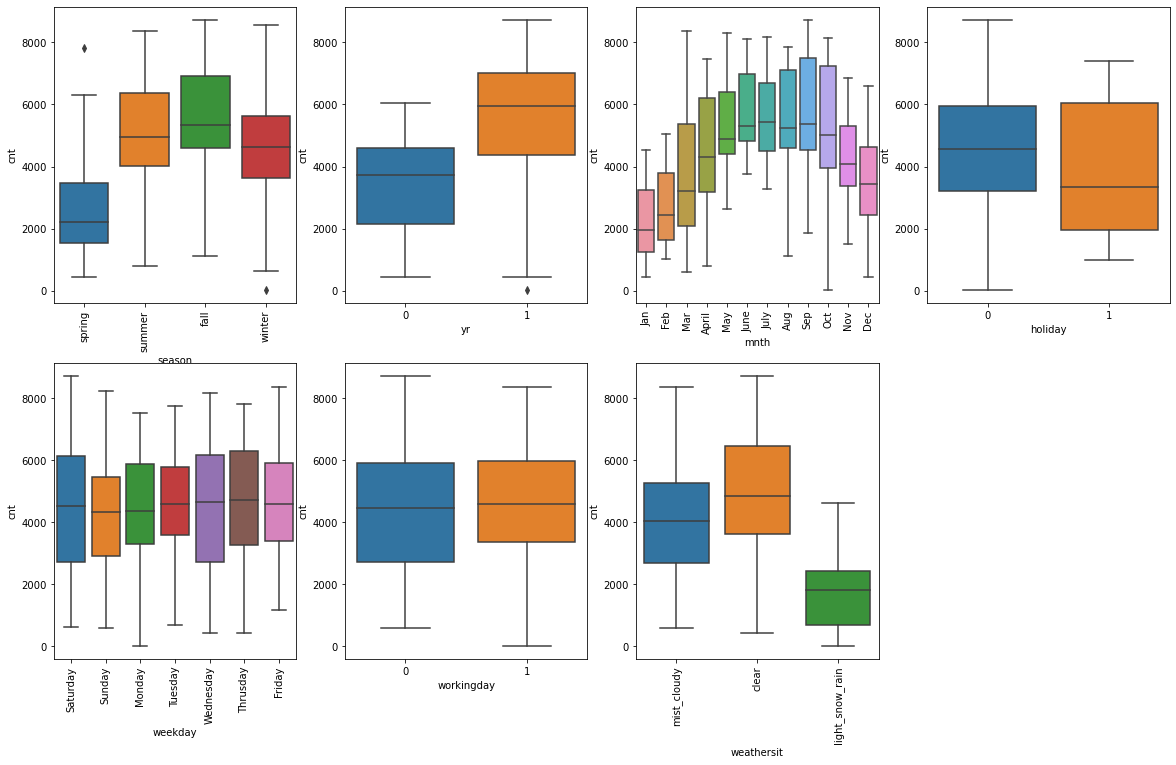

In [104]:
# Boxplot to visualise the categorical variables 
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x ='season' , y = 'cnt', data =df_bike)
plt.xticks(rotation=90)
plt.subplot(2,4,2)
sns.boxplot(x ='yr' , y = 'cnt', data =df_bike)
plt.subplot(2,4,3)
sns.boxplot(x ='mnth' , y = 'cnt', data =df_bike,orient= "v")
plt.xticks(rotation=90)
plt.subplot(2,4,4)
sns.boxplot(x ='holiday' , y = 'cnt', data =df_bike)
plt.subplot(2,4,5)
sns.boxplot(x ='weekday' , y = 'cnt', data =df_bike)
plt.xticks(rotation=90)
plt.subplot(2,4,6)
sns.boxplot(x ='workingday' , y = 'cnt', data =df_bike)
plt.subplot(2,4,7)
sns.boxplot(x ='weathersit' , y = 'cnt', data =df_bike)
plt.xticks(rotation=90)
plt.show()

# Dummification

In [23]:
df_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [105]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'dummy_season'
dummy_season = pd.get_dummies(df_bike['season'],drop_first=True)


In [106]:
# Add the results to the original housing dataframe

df_bike=pd.concat([df_bike,dummy_season], axis = 1)

In [107]:
df_bike.drop('season',axis=1,inplace=True)

In [108]:
df_bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Saturday,0,mist_cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sunday,0,mist_cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [109]:
dummy_weather = pd.get_dummies(df_bike['weathersit'],drop_first=True)

In [110]:
df_bike=pd.concat([df_bike,dummy_weather], axis = 1)

In [111]:
df_bike.drop('weathersit',axis=1,inplace=True)

In [112]:
df_bike.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,light_snow_rain,mist_cloudy
0,0,Jan,0,Saturday,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Sunday,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Monday,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Tuesday,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Wednesday,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [113]:
dummy_mnth = pd.get_dummies(df_bike['mnth'],drop_first=True)
df_bike=pd.concat([df_bike,dummy_mnth],axis=1)
df_bike.drop('mnth',axis=1,inplace=True)

In [114]:
dummy_mnth = pd.get_dummies(df_bike['weekday'],drop_first=True)
df_bike=pd.concat([df_bike,dummy_mnth],axis=1)
df_bike.drop('weekday',axis=1,inplace=True)

In [115]:
df_bike.shape

(730, 29)

# Model Building 

In [116]:
# Importing the stats model for linear Regression
import sklearn
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [117]:
df_bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'light_snow_rain', 'mist_cloudy', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Split the Training and Testing dataframe 


In [118]:
np.random.seed(0)
df_train, df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling using Min-Max scaling or Normalising scaling

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler =MinMaxScaler()

In [37]:
df_bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'light_snow_rain', 'mist_cloudy', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [121]:
scaling_var=['temp','hum','windspeed','cnt']
df_train[scaling_var]=scaler.fit_transform(df_train[scaling_var])

In [46]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


<AxesSubplot:>

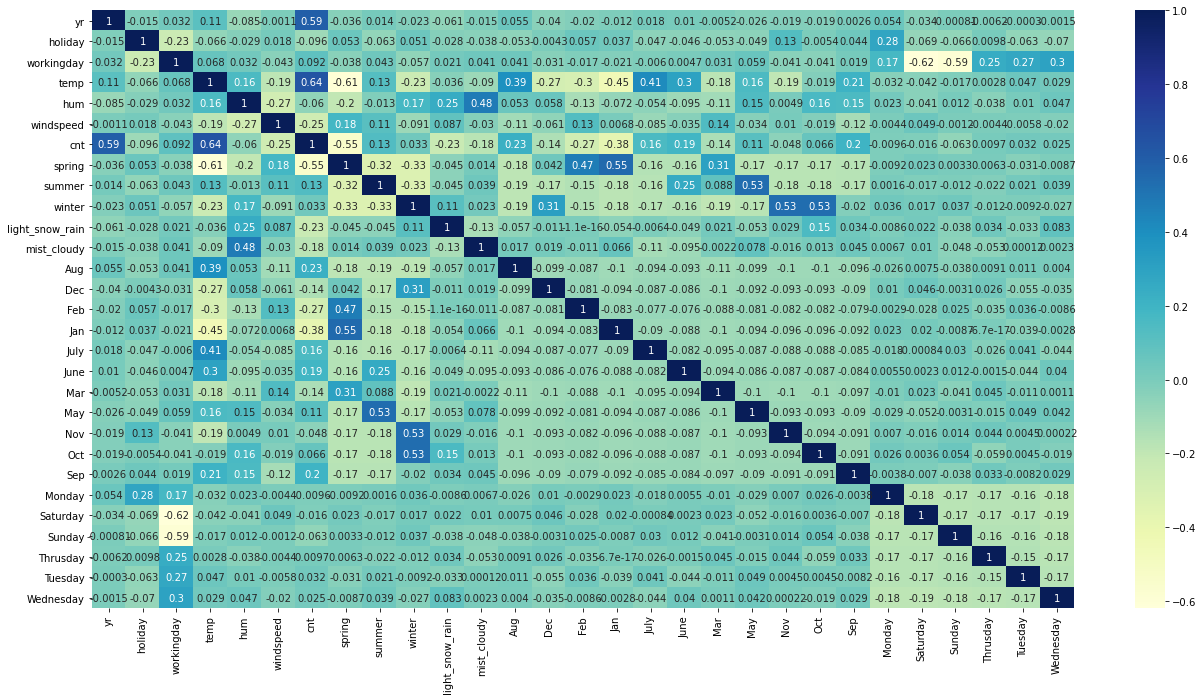

In [48]:
plt.figure(figsize=(22,11))
sns.heatmap(df_train.corr(),annot=True ,cmap="YlGnBu")

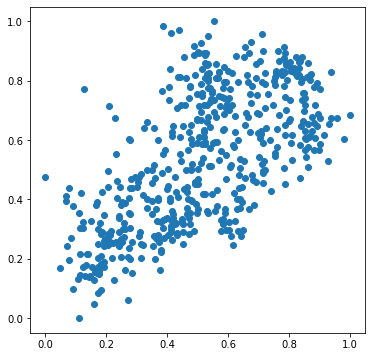

In [122]:
#Scatter plot between the most correlated variable vs target variable  
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.temp)
plt.show()

### Separate the target variable from predictive variables

In [123]:
y_train = df_train.pop('cnt')
X_train = df_train

Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [124]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,light_snow_rain,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Feature selection using RFE

In [125]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train,y_train)

In [126]:
#list of most significant variable from RFE analysis
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light_snow_rain', True, 1),
 ('mist_cloudy', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 10),
 ('Mar', False, 11),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thrusday', False, 12),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13)]

In [127]:
# 15 column based on RFE analysis
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'light_snow_rain', 'mist_cloudy', 'Jan', 'July',
       'Sep', 'Saturday'],
      dtype='object')

In [128]:
# least significant columns
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Train the RFE selected columns

In [129]:
X_train_rfe = X_train[col]

In [130]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [131]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [132]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.31e-191
Time:                        21:20:53   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2510      0.036      6.949      0.000       0.180       0.322
yr                  0.2305      0.008     28.807      0.000       0.215       0.246
holiday            -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday          0.0435      0.012      3.781      0.000       0.021       0.066
temp                0.5098      0.034     14.851      0.000       0.442       0.577
hum                -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed          -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring             -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer              0.0497      0.015      3.346      0.001       0.020       0.079
winter              0.0944      0.017      5.479      0.000       0.061       0.128
light_snow_rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
mist_cloudy        -0.0578      0.010     -5.574      0.000      -0.078      -0.037
Jan                -0.0343      0.017     -1.980      0.048      -0.068      -0.000
July               -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sep                 0.0812      0.016      4.934      0.000       0.049       0.114
Saturday            0.0537      0.014      3.707      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From this stat summary we can conclude that All the variable coefficient are significant (alpha<0.05).

- Therefore we check for multi-collinearity and check the VIF of all the predictor variables

In [133]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
7,spring,5.08
4,temp,3.89
9,winter,3.60
8,summer,2.64
5,hum,1.92
3,workingday,1.88
15,Saturday,1.78
11,mist_cloudy,1.57
12,Jan,1.57


### Inference
- From the above table we can say that Spring, temp, winter,summer are the most correlated variables.Hence we decide to first remove the highest VIF value variable i.e. Spring and again rebuild the model 

In [134]:
X_train_1 = X_train_rfe.drop(['spring'], axis = 1)

In [135]:
X_train_rfe = sm.add_constant(X_train_1)

In [136]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [137]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.24e-191
Time:                        21:21:11   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2003      0.030     

- Again all the variable has significant coeeficient as p values lies in significant region so we again check for VIF.

In [138]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.90
3,workingday,1.88
14,Saturday,1.78
10,mist_cloudy,1.56
11,Jan,1.55
8,winter,1.53
12,July,1.43
7,summer,1.41


### Inference 
- From the VIF of preditor variable we will see temp variable VIF is almost 2 but when we see its coefficient its highly correlated with target variable also bussiness importance we are decided to go with it as a predictor variable

### Train the RFE selected columns

In [139]:
# Making the train_X and train_y by dropping the cnt variable 
X_train_final = X_train_1.drop(['const'], axis=1)

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), we plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

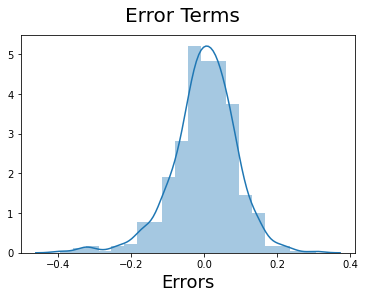

In [140]:
# Plot the histogram of the error terms
y_train_cnt = lm.predict(X_train_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     

- By looking to plot it is a normally distributed with mean =0 so it validate that assumptions

# Making Predictions

-Applying the scaling on the test sets

In [141]:
# transform the numerical variable to rescale
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

- Split Test dataset into target and pridtor variable 

In [142]:
y_test = df_test.pop('cnt')
X_test = df_test

In [143]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_1= X_test[X_train_final.columns]

# Adding a constant variable 
X_test_1= sm.add_constant(X_test_1)

In [144]:
# Making predictions
y_pred = lm.predict(X_test_1)

# Model Evaluation

Text(0, 0.5, 'y_pred')

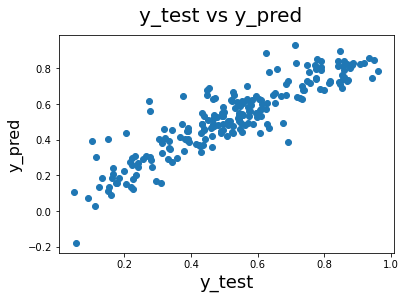

In [145]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Model validatation 

In [61]:
#Test R-square score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8045864770086913

In [62]:
#Train R-square score
from sklearn.metrics import r2_score
y_pred_1 = lm.predict(X_train_rfe)
r2_score(y_train, y_pred_1)

0.8467286105922922

# Linear model 

We can see that the equation of our best fitted line is:

$ cnt = 0.2294 \times  yr - 0.060  \times  holiday + 0.0439 \times workingday + 0.5677 \times temp -0.1643 \times hum - 0.1932 \times windspeed +0.0746 \times summer + 0.1266 \times winter -0.2446 \times life_snow_rain - 0.0556 \times mist_cloudy -0.0392 \times Jan -0.0445 \times July +0.0926 \times Sep + 0.0540 \times Saturday $


# Check by removing the temp variable


- 

In [146]:
X_train_2 = X_train_rfe.drop(['temp'], axis = 1)

In [147]:
X_train_rfe = sm.add_constant(X_train_2)

In [148]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     84.51
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.18e-116
Time:                        21:47:07   Log-Likelihood:                 336.31
No. Observations:                 510   AIC:                            -644.6
Df Residuals:                     496   BIC:                            -585.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3920      0.041     

In [149]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.45
3,workingday,1.88
13,Saturday,1.78
4,hum,1.77
9,mist_cloudy,1.51
6,summer,1.40
7,winter,1.39
8,light_snow_rain,1.23
10,Jan,1.20
11,July,1.19


- After removing the temp variable R square and adjusted R square reduce very significantly also many coeffcient become unsignificant so its also the reason for not droping the temp variable.  

### Rebuild the model after the removing the insignificant variable

In [150]:
X_train_3= X_train_rfe.drop(['hum'], axis = 1)

In [151]:
X_train_rfe=sm.add_constant(X_train_3)

In [152]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     91.43
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.15e-117
Time:                        21:51:32   Log-Likelihood:                 335.71
No. Observations:                 510   AIC:                            -645.4
Df Residuals:                     497   BIC:                            -590.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4290      0.022     

In [153]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.45
3,workingday,1.88
13,Saturday,1.78
4,hum,1.77
9,mist_cloudy,1.51
6,summer,1.40
7,winter,1.39
8,light_snow_rain,1.23
10,Jan,1.20
11,July,1.19


In [79]:
X_train_3 = X_train_rfe.drop(['holiday'], axis = 1)
X_train_rfe=sm.add_constant(X_train_3)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     98.96
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          1.12e-117
Time:                        21:26:37   Log-Likelihood:                 333.99
No. Observations:                 510   AIC:                            -644.0
Df Residuals:                     498   BIC:                            -593.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4185      0.021     

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.24
2,workingday,1.64
11,Saturday,1.63
4,summer,1.40
5,winter,1.37
8,Jan,1.20
9,July,1.19
10,Sep,1.12
3,windspeed,1.06
6,light_snow_rain,1.05


In [83]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'summer', 'winter',
       'light_snow_rain', 'mist_cloudy', 'Jan', 'July', 'Sep', 'Saturday'],
      dtype='object')

Text(0.5, 0, 'Errors')

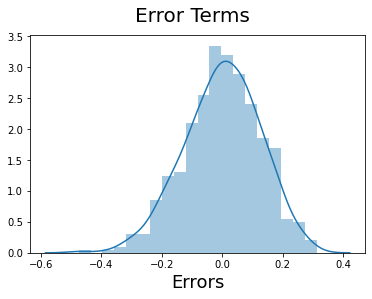

In [154]:
# Plot the histogram of the error terms
y_train_cnt = lm.predict(X_train_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     

In [155]:
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

KeyError: "['cnt'] not in index"

In [156]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'light_snow_rain', 'mist_cloudy', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [88]:
y_test = df_test.pop('cnt')
X_test = df_test

In [157]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'light_snow_rain', 'mist_cloudy', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [158]:
X_train_3 = X_train_3.drop(['const'], axis=1)

In [159]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_3.columns]

# Adding a constant variable 
X_test_new= sm.add_constant(X_test_new)

In [160]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

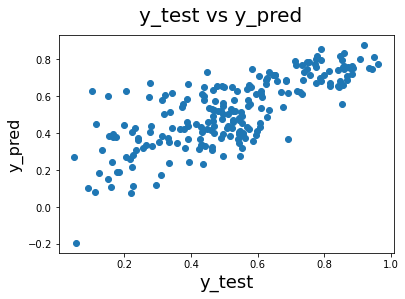

In [161]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [162]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5714636949074154

In [163]:
y_pred_1 = lm.predict(X_train_rfe)

In [164]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_1)

0.6882347839362433